# Genre Analysis

## Movie numbers of different genres

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Category Distribution: Number / Score / Box Office
# Load the dataset
df = pd.read_csv("data/Top250Movies.csv")
df = df.replace("Not Available", 0)
df["box_office"] = df["box_office"].astype(int)
df["budget"] = df["budget"].astype(int)
df =  df.set_index(["movie_name","rank","box_office","budget","rating"])["genre"].str.split(",", expand=True)\
    .stack().reset_index(drop=True, level=-1).reset_index().rename(columns={0: "type"})

In [2]:
type_number = df.groupby("type")
types = []
num = []
ratings = []
box_office = []
mean_box = []
for movie_type,group in type_number:
    types.append(movie_type)
    num.append(group.shape[0])
    ratings.append(group["rating"].mean())
    box_office.append(group["box_office"].sum())
    mean_box.append(group["box_office"].sum()/group.shape[0])

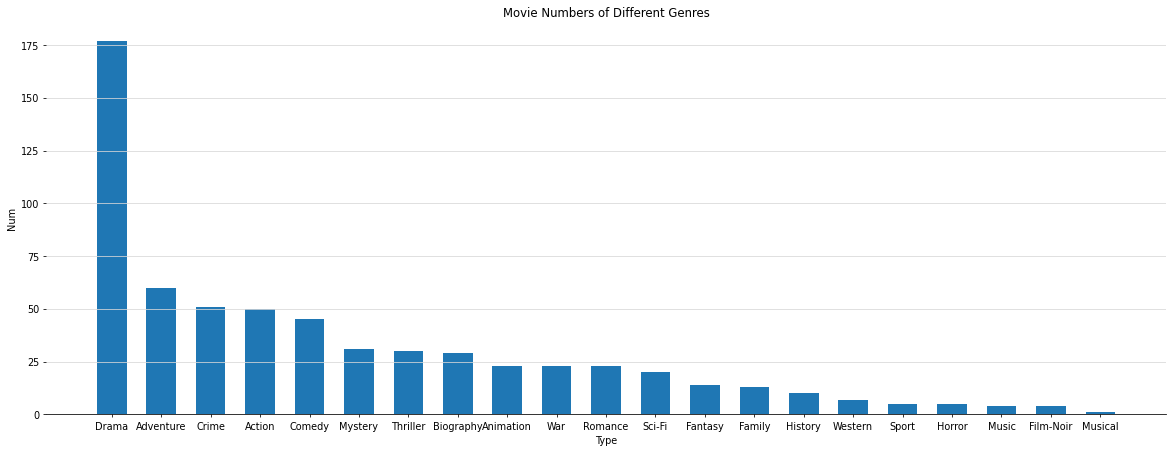

In [3]:
mydata = pd.DataFrame({'Type':types,'Num':num})
Sort_data = mydata.sort_values(by='Num', ascending=False)

fig = plt.figure(figsize=(20, 7), dpi=70)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 
 
plt.bar(Sort_data['Type'], Sort_data['Num'],
        width=0.6, align="center", label="Type")

plt.title("Movie Numbers of Different Genres")
plt.xlabel('Type')
plt.ylabel('Num')
plt.show()

## Average ratings of different genres

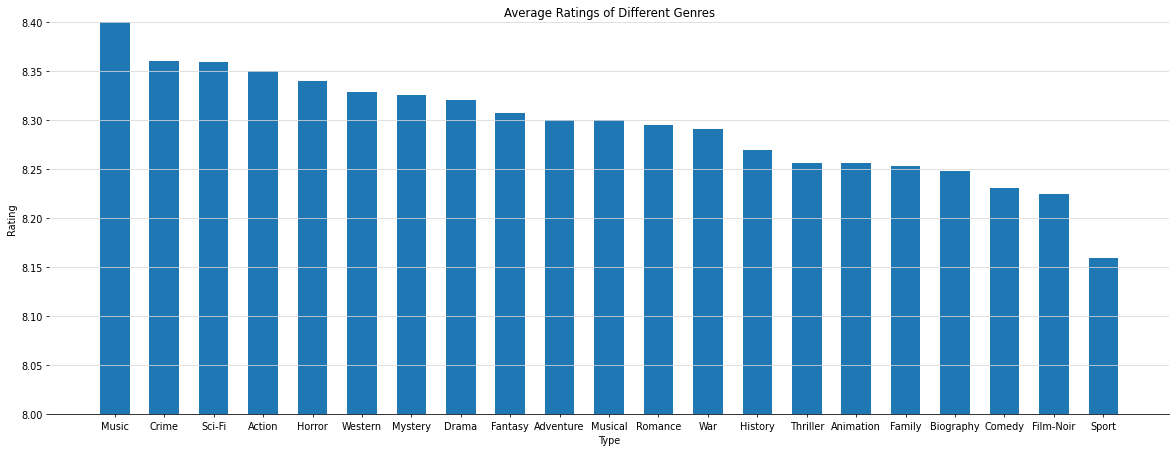

In [4]:
mydata = pd.DataFrame({'Type':types,'Rating':ratings})
Sort_data = mydata.sort_values(by='Rating', ascending=False)

fig = plt.figure(figsize=(20, 7), dpi=70)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 
 
plt.bar(Sort_data['Type'], Sort_data['Rating'],
        width=0.6, align="center", label="Type")

plt.title("Average Ratings of Different Genres")
plt.ylim(8, 8.4)
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

## Total box office of different genres

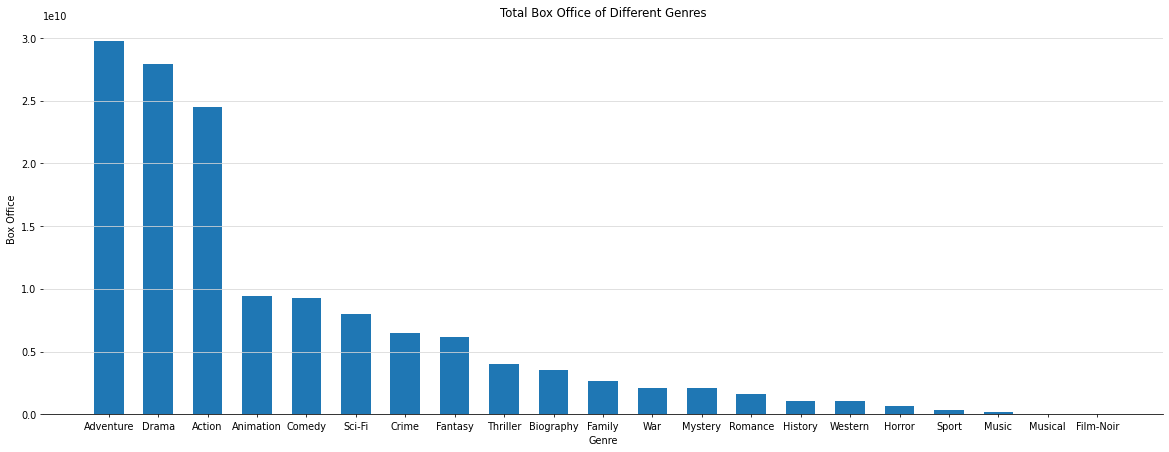

In [5]:
mydata = pd.DataFrame({'Type':types,'Box Office':box_office})
Sort_data = mydata.sort_values(by='Box Office', ascending=False)

fig = plt.figure(figsize=(20, 7), dpi=70)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 
 
plt.bar(Sort_data['Type'], Sort_data['Box Office'],
        width=0.6, align="center", label="Type")

plt.title("Total Box Office of Different Genres") 
plt.xlabel('Genre')
plt.ylabel('Box Office')
plt.show()

## Average box office of different genres

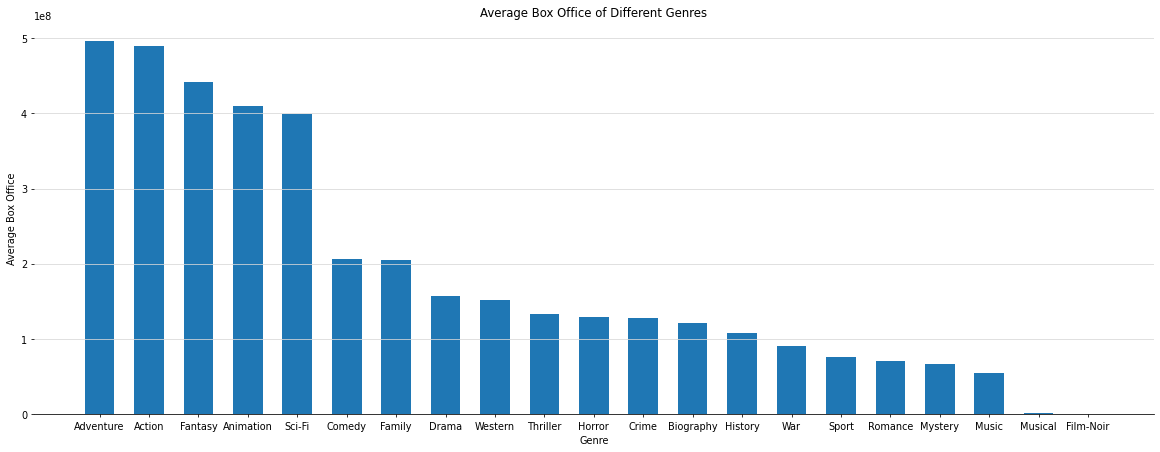

In [6]:
mydata = pd.DataFrame({'Type':types,'Mean Box Office':mean_box})
Sort_data = mydata.sort_values(by='Mean Box Office', ascending=False)

fig = plt.figure(figsize=(20, 7), dpi=70)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 
 
plt.bar(Sort_data['Type'], Sort_data['Mean Box Office'],
        width=0.6, align="center", label="Type")

plt.title("Average Box Office of Different Genres") 
plt.xlabel('Genre')
plt.ylabel('Average Box Office')
plt.show()

# Released Year Analysis

## Average ratings in different released years

In [7]:
# Load the dataset
df = pd.read_csv("data/Top250Movies.csv")
df = df.replace("Not Available", 0)
df["box_office"] = df["box_office"].astype(int)
df["budget"] = df["budget"].astype(int)
df["profit"] = df["box_office"] - df["budget"]
year_info =  df.groupby("year")

In [8]:
years = []
num = []
ratings = []
box_office = []
mean_box = []
for year,group in year_info:
    years.append(year)
    num.append(group.shape[0])
    ratings.append(group["rating"].mean())
    box_office.append(group["box_office"].sum())
    mean_box.append(group["box_office"].sum()/group.shape[0])

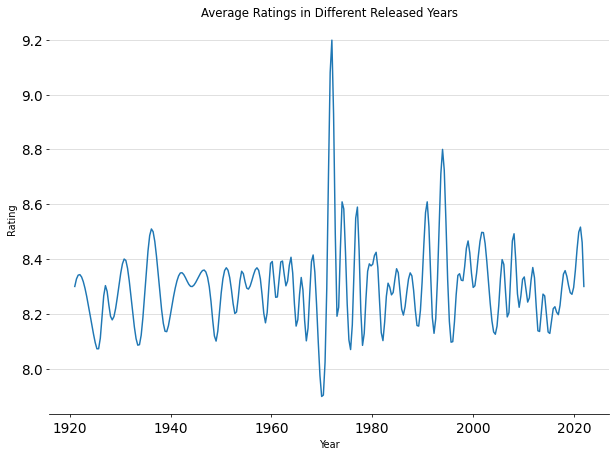

In [9]:
from scipy.interpolate import make_interp_spline
fig = plt.figure(figsize=(10, 7), dpi=70)
years_smooth = np.linspace(np.array(years).min(),np.array(years).max(), 300)
ratings_smooth = make_interp_spline(years, ratings)(years_smooth)
plt.plot(years_smooth, ratings_smooth)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 

plt.title("Average Ratings in Different Released Years")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.tick_params(axis='both', labelsize=14)
plt.show()

## Movie numbers in different released years

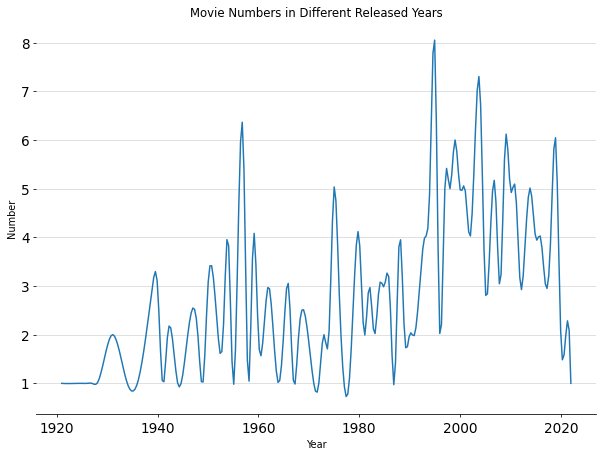

In [10]:
fig = plt.figure(figsize=(10, 7), dpi=70)
num_smooth = make_interp_spline(years, num)(years_smooth)
plt.plot(years_smooth, num_smooth)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 
plt.title("Movie Numbers in Different Released Years")
plt.xlabel("Year")
plt.ylabel("Number")
plt.tick_params(axis='both', labelsize=14)
plt.show()

## Total box office in different released years

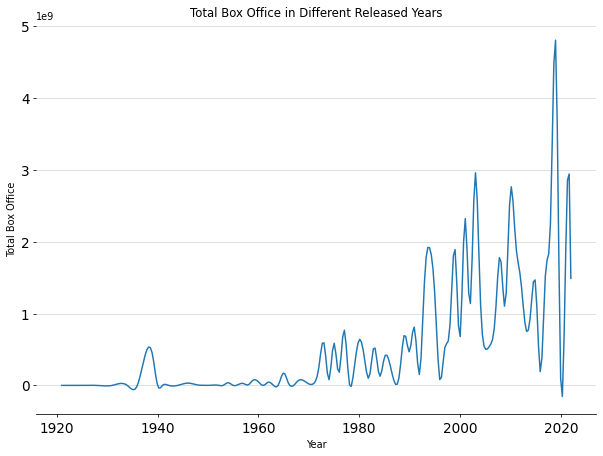

In [11]:
fig = plt.figure(figsize=(10, 7), dpi=70)
box_smooth = make_interp_spline(years, box_office)(years_smooth)
plt.plot(years_smooth, box_smooth)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 
plt.title("Total Box Office in Different Released Years")
plt.xlabel("Year")
plt.ylabel("Total Box Office")
plt.tick_params(axis='both', labelsize=14)
plt.show()

## Average box office in different released years

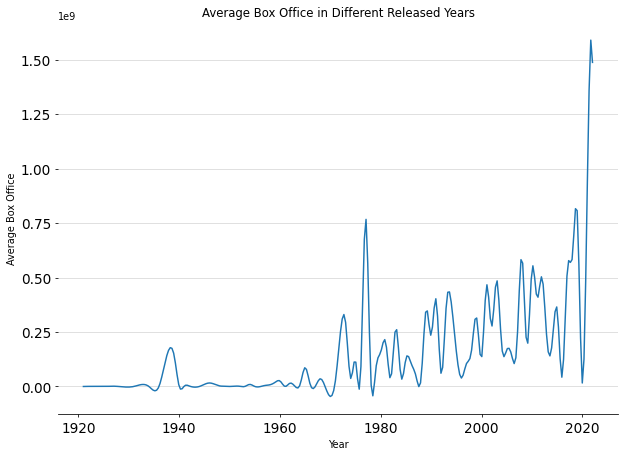

In [12]:
fig = plt.figure(figsize=(10, 7), dpi=70)
mean_smooth = make_interp_spline(years, mean_box)(years_smooth)
plt.plot(years_smooth, mean_smooth)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 
plt.title("Average Box Office in Different Released Years")
plt.xlabel("Year")
plt.ylabel("Average Box Office")
plt.tick_params(axis='both', labelsize=14)
plt.show()

## Correlation between rating & box office of a specific movie

In [13]:
rating_info = df.groupby('rating')
ratings = []
box_office = []
mean_box = []
for rating,group in rating_info:
    ratings.append(rating)
    box_office.append(group["box_office"].sum())
    mean_box.append(group["box_office"].mean())

In [14]:
print(df[['rating', 'box_office']].corr(method='pearson'), "\n")
print(df[['rating', 'box_office']].corr(method='spearman'), "\n")
print(df[['rating', 'box_office']].corr(method='kendall'), "\n")

              rating  box_office
rating      1.000000    0.179451
box_office  0.179451    1.000000 

              rating  box_office
rating      1.000000    0.170388
box_office  0.170388    1.000000 

              rating  box_office
rating      1.000000    0.123296
box_office  0.123296    1.000000 



## Correlation between rating & total box office of movies with this rating

In [15]:
mydf = pd.DataFrame({'rating':ratings,'Total Box Office':box_office})
print(mydf[['rating', 'Total Box Office']].corr(method='pearson'), "\n")
print(mydf[['rating', 'Total Box Office']].corr(method='spearman'), "\n")
print(mydf[['rating', 'Total Box Office']].corr(method='kendall'), "\n")

                    rating  Total Box Office
rating            1.000000         -0.644934
Total Box Office -0.644934          1.000000 

                    rating  Total Box Office
rating            1.000000         -0.659341
Total Box Office -0.659341          1.000000 

                    rating  Total Box Office
rating            1.000000         -0.538462
Total Box Office -0.538462          1.000000 



## Correlation between rating & average box office of movies with this rating

In [16]:
mydf = pd.DataFrame({'rating':ratings,'Average Box Office':mean_box})
print(mydf[['rating', 'Average Box Office']].corr(method='pearson'), "\n")
print(mydf[['rating', 'Average Box Office']].corr(method='spearman'), "\n")
print(mydf[['rating', 'Average Box Office']].corr(method='kendall'), "\n")

                      rating  Average Box Office
rating              1.000000            0.157702
Average Box Office  0.157702            1.000000 

                      rating  Average Box Office
rating              1.000000            0.230769
Average Box Office  0.230769            1.000000 

                      rating  Average Box Office
rating              1.000000            0.179487
Average Box Office  0.179487            1.000000 



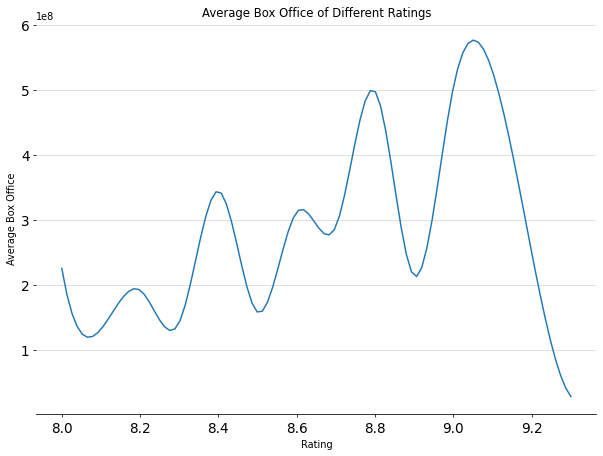

In [17]:
fig = plt.figure(figsize=(10, 7), dpi=70)
ratings_smooth = np.linspace(np.array(ratings).min(),np.array(ratings).max(), 100)
box_smooth = make_interp_spline(ratings, mean_box)(ratings_smooth)
plt.plot(ratings_smooth, box_smooth)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 
plt.title("Average Box Office of Different Ratings")

plt.xlabel("Rating")
plt.ylabel("Average Box Office")
plt.tick_params(axis='both', labelsize=14)
plt.show()

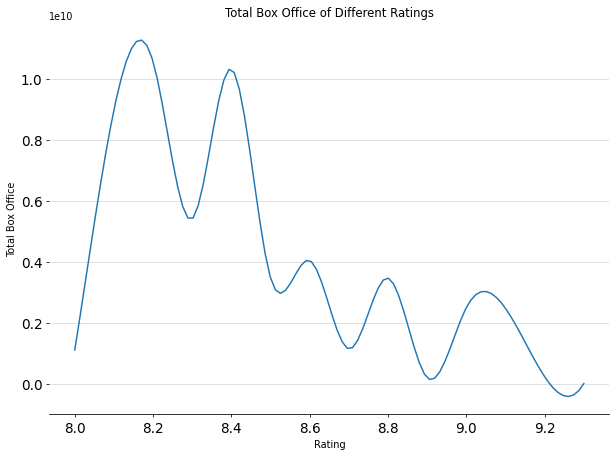

In [18]:
fig = plt.figure(figsize=(10, 7), dpi=70)
ratings_smooth = np.linspace(np.array(ratings).min(),np.array(ratings).max(), 100)
box_smooth = make_interp_spline(ratings, box_office)(ratings_smooth)
plt.plot(ratings_smooth, box_smooth)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  

ax = plt.gca()  
ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none') 
ax.spines['left'].set_color('none') 
plt.title("Total Box Office of Different Ratings")

plt.xlabel("Rating")
plt.ylabel("Total Box Office")
plt.tick_params(axis='both', labelsize=14)
plt.show()

## Correlation between budget & box office

In [19]:
print(df[['box_office', 'budget']].corr(method='pearson'), "\n")
print(df[['box_office', 'budget']].corr(method='spearman'), "\n")
print(df[['box_office', 'budget']].corr(method='kendall'), "\n")

            box_office  budget
box_office       1.000   0.271
budget           0.271   1.000 

            box_office    budget
box_office    1.000000  0.863669
budget        0.863669  1.000000 

            box_office   budget
box_office     1.00000  0.69306
budget         0.69306  1.00000 



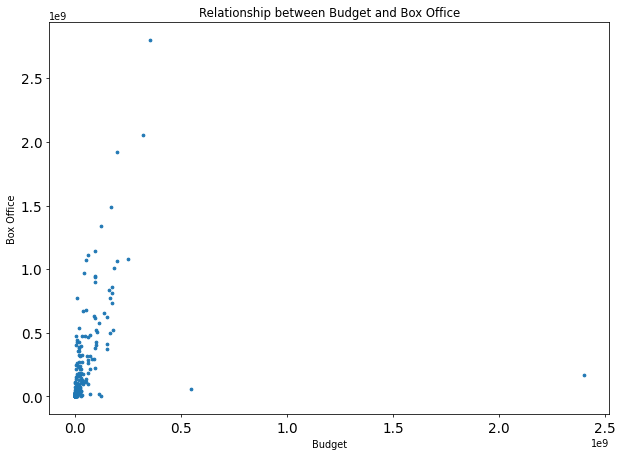

In [20]:
fig = plt.figure(figsize=(10, 7), dpi=70)
plt.scatter(df['budget'], df['box_office'], s=8.)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  

plt.title("Relationship between Budget and Box Office")

plt.xlabel("Budget")
plt.ylabel("Box Office")
plt.tick_params(axis='both', labelsize=14)
plt.show()

## Correlation between budget & profit

In [21]:
print(df[['profit', 'budget']].corr(method='pearson'), "\n")
print(df[['profit', 'budget']].corr(method='spearman'), "\n")
print(df[['profit', 'budget']].corr(method='kendall'), "\n")

          profit    budget
profit  1.000000 -0.178088
budget -0.178088  1.000000 

          profit    budget
profit  1.000000  0.679416
budget  0.679416  1.000000 

          profit    budget
profit  1.000000  0.511133
budget  0.511133  1.000000 



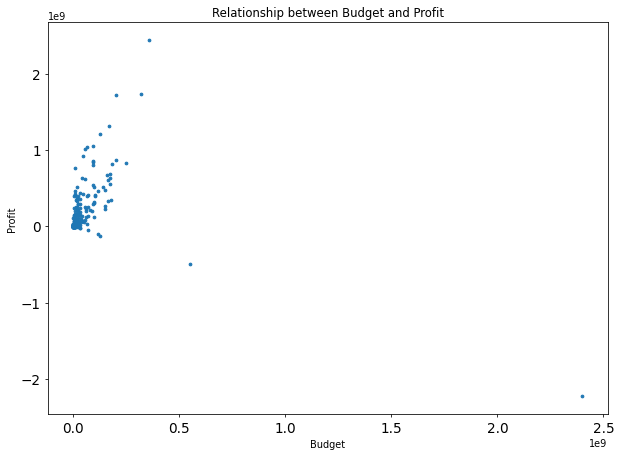

In [22]:
fig = plt.figure(figsize=(10, 7), dpi=70)
plt.scatter(df['budget'], df['profit'], s=8.)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  

plt.title("Relationship between Budget and Profit")

plt.xlabel("Budget")
plt.ylabel("Profit")
plt.tick_params(axis='both', labelsize=14)
plt.show()

## Correlation between profit & box office

In [23]:
print(df[['profit', 'box_office']].corr(method='pearson'), "\n")
print(df[['profit', 'box_office']].corr(method='spearman'), "\n")
print(df[['profit', 'box_office']].corr(method='kendall'), "\n")

             profit  box_office
profit      1.00000     0.89893
box_office  0.89893     1.00000 

              profit  box_office
profit      1.000000    0.926252
box_office  0.926252    1.000000 

              profit  box_office
profit      1.000000    0.820044
box_office  0.820044    1.000000 



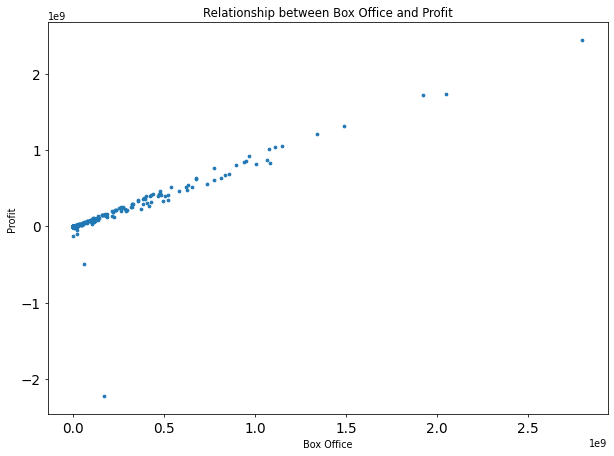

In [24]:
fig = plt.figure(figsize=(10, 7), dpi=70)
plt.scatter(df['box_office'], df['profit'], s=8.)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  

plt.title("Relationship between Box Office and Profit")

plt.xlabel("Box Office")
plt.ylabel("Profit")
plt.tick_params(axis='both', labelsize=14)
plt.show()